In [1]:
import numpy as np
import pandas as pd
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

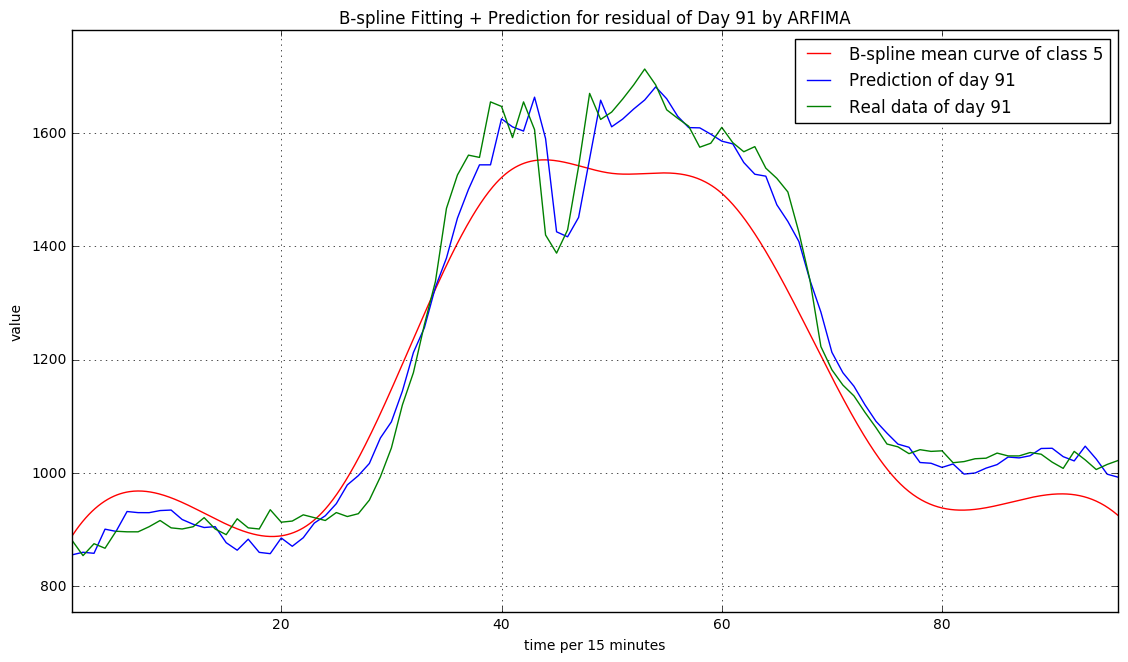

RMSE of Prediction : 41.3524848567
雜訊訊號比 : 0.0344451548901


In [10]:
mean_class=pd.read_csv("mean_class.csv")
power=pd.read_csv("power.csv",header=None).values.astype('float32')
power=np.reshape(power,(365,96))
ArfimaPredict1Day=pd.read_csv("ArfimaPredict1day.csv").values
ArfimaPredict1Day=np.array(list(np.reshape(ArfimaPredict1Day,(96))))
Dforecast, ClassofForecast=91,5
x = np.array(list(range(1,97)))
y = mean_class.values.astype('float32')[:,(ClassofForecast-1)]
N, xmin, xmax = 1000, x.min(), x.max()
xx = np.linspace(xmin, xmax, N)


NInterpolate, Interpolate = 10, [] #NInterpolate為內點個數，Interpolate為所需要的內點
for i in range(NInterpolate):
    Interpolate.append(xmin+(i+1)*(xmax-xmin)/(NInterpolate+1))
S, K=75, 3

t, c, k = interpolate.splrep(x, y, s=S, k=K, task=-1, t=np.asarray([24,40,50,60,76])) 
spline = interpolate.BSpline(t, c, k, extrapolate=False)
plt.figure(figsize=(13.5, 7.5))
#plt.plot(x, y, 'o', c='b', label='Mean of all observation points in class'+str(i+1))
plt.plot(xx, spline(xx), 'r', label='B-spline mean curve of class '+str(ClassofForecast))
Ymix=ArfimaPredict1Day+spline(x)
plt.plot(x, Ymix, 'b', label='Prediction of day '+str(Dforecast))
plt.plot(x, power[Dforecast-1], 'g', label='Real data of day '+str(Dforecast))
plt.xlim(xmin, xmax); plt.ylim(np.min(Ymix)-100, np.max(Ymix)+100)
plt.legend()
plt.xlabel('time per 15 minutes'); plt.ylabel('value')
plt.title("B-spline Fitting + Prediction for residual of Day "+str(Dforecast)+" by ARFIMA")
plt.grid()
#plt.savefig('PredictClass5.jpg')
plt.show()

NSR=np.sqrt(mean_squared_error(Ymix,power[Dforecast-1])) / np.mean(power[Dforecast-1]) #雜訊訊號比
RMSEprediction=np.sqrt(mean_squared_error(Ymix,power[Dforecast-1]))
print("RMSE of Prediction",":",RMSEprediction)
print("雜訊訊號比",":",NSR)


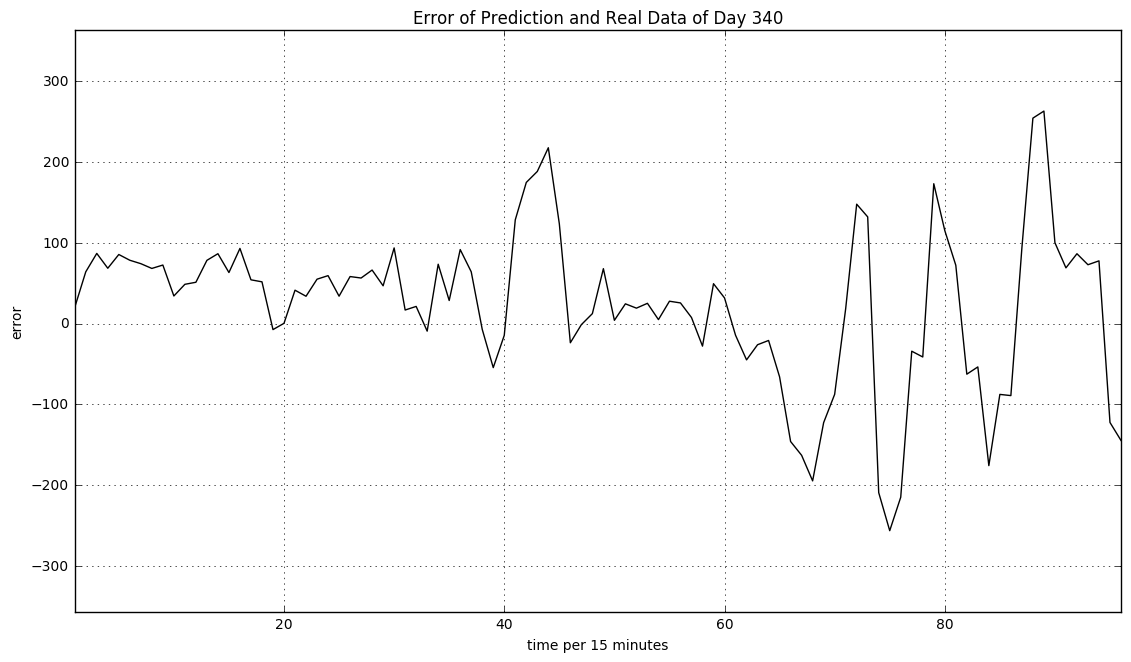

In [6]:
plt.figure(figsize=(13.5, 7.5))
plt.plot(x, Ymix-power[Dforecast-1], 'k')
plt.xlim(xmin, xmax); plt.ylim(np.min(Ymix-power[Dforecast-1])-100, np.max(Ymix-power[Dforecast-1])+100)
plt.xlabel('time per 15 minutes'); plt.ylabel('error')
plt.title("Error of Prediction and Real Data of Day "+str(Dforecast))
plt.grid()
plt.show()

#### 以下是對每一類抽樣後預測的RMSE與NSR進行平均

In [124]:
mean_class=pd.read_csv("mean_class.csv")
power=pd.read_csv("power.csv",header=None).values.astype('float32')
power=np.reshape(power,(365,96))
ArfimaPredictclass1=pd.read_csv("ArfimaPredictclass1.csv")
ArfimaPredictclass2=pd.read_csv("ArfimaPredictclass2.csv")
ArfimaPredictclass3=pd.read_csv("ArfimaPredictclass3.csv")
ArfimaPredictclass4=pd.read_csv("ArfimaPredictclass4.csv")
ArfimaPredictclass5=pd.read_csv("ArfimaPredictclass5.csv")

In [129]:
APC=ArfimaPredictclass1
ClassofForecast=1
RMSEpredictionClass, NSRClass=[],[]
for j in range(APC.shape[1]):
    Dforecast=int(APC.columns[j])

    x = np.array(list(range(1,97)))
    y = mean_class.values.astype('float32')[:,(ClassofForecast-1)]
    N, xmin, xmax = 1000, x.min(), x.max()
    xx = np.linspace(xmin, xmax, N)
    NInterpolate, Interpolate = 10, [] #NInterpolate為內點個數，Interpolate為所需要的內點
    for i in range(NInterpolate):
        Interpolate.append(xmin+(i+1)*(xmax-xmin)/(NInterpolate+1))
    S, K=75, 3
    t, c, k = interpolate.splrep(x, y, s=S, k=K, task=-1, t=np.asarray([24,40,50,60,76])) 
    spline = interpolate.BSpline(t, c, k, extrapolate=False)

    Ymix=APC.values[:,j]+spline(x)

    NSR=np.sqrt(mean_squared_error(Ymix,power[Dforecast-1])) / np.mean(power[Dforecast-1]) #雜訊訊號比
    RMSEprediction=np.sqrt(mean_squared_error(Ymix,power[Dforecast-1])) #RMSE
    RMSEpredictionClass.append(RMSEprediction)
    NSRClass.append(NSR)
print("Class",ClassofForecast)
print("平均NSR",np.mean(NSRClass))
print("平均RMSE",np.mean(RMSEpredictionClass))

Class 1
平均NSR 0.0309431570808
平均RMSE 30.6462043229
